In [1]:
import numpy as np
from sympy import symbols,diff,sin,cos,Matrix
import matplotlib.pyplot as plt

In [2]:
theta2_true = np.deg2rad(-2.07) # rad
theta3_true = np.deg2rad(-8.79) # rad
voltage3_true = 0.9781 # pu
def PCE(act,exp):
    pce = abs((act-exp)/exp)*100
    return pce

## Power Flow Analysis Using Newton-Raphson Method

In [3]:
# plot arrays
NR_iteration = []
NR_theta2 = []
NR_theta3 = []
NR_voltage3 = []
NR_t2error = []
NR_t3error = []
NR_v3error = []
# admittance matrix
Y = Matrix([[-36.92,21.097,15.823],[21.097,-42.194,21.097],[15.823,21.097,-36.92]])
# known variables
v1 = 1
t1 = 0
v2 = 1.05
p2 = 2
p3 = 5
q3 = 1
# power flow equations
t2, t3, v3 = symbols('t2 t3 v3', real=True)
fp2 = (v2*v1*Y[1,0]*sin(t2-t1))+(v2*v3*Y[1,2]*sin(t2-t3))-2
fp3 = (v3*v1*Y[2,0]*sin(t3-t1))+(v3*v2*Y[2,1]*sin(t3-t2))+5
fq3 = (-Y[2,2]*(v3**2))-(v3*v1*Y[2,0]*cos(t3-t1))-(v3*v2*Y[2,1]*cos(t3-t2))+1
# compute partial derivatives
dfp2dt2 = diff(fp2,t2)
dfp2dt3 = diff(fp2,t3)
dfp2dv3 = diff(fp2,v3)
dfp3dt2 = diff(fp3,t2)
dfp3dt3 = diff(fp3,t3)
dfp3dv3 = diff(fp3,v3)
dfq3dt2 = diff(fq3,t2)
dfq3dt3 = diff(fq3,t3)
dfq3dv3 = diff(fq3,v3)
# unknown variables / initial guesses
t2 = 0
t3 = 0
v3 = 1
NR_iteration.append(0)
NR_theta2.append(t2)
NR_theta3.append(t3)
NR_voltage3.append(v3)
NR_t2error.append(1)
NR_t3error.append(1)
NR_v3error.append(1)
# parameters
max_iter = 100
threshold = 0.0001
i = 0
done = False
fx = Matrix([[1],[1],[1]])

# perform N-R analysis
while not done:
    i += 1
    # define f(x), J(x), xnew
    x = Matrix([[t2],[t3],[v3]])
    # print(x.shape,x)
    fx = Matrix([[(v2*v1*Y[1,0]*sin(t2-t1))+(v2*v3*Y[1,2]*sin(t2-t3))-2],\
                   [(v3*v1*Y[2,0]*sin(t3-t1))+(v3*v2*Y[2,1]*sin(t3-t2))+5],\
                   [(-Y[2,2]*(v3**2))-(v3*v1*Y[2,0]*cos(t3-t1))-(v3*v2*Y[2,1]*cos(t3-t2))+1]])
    # print(fx.shape,fx)
    J = Matrix([[22.15185*v3*cos(t2-t3)+22.15185*cos(t2),-22.15185*v3*cos(t2-t3),22.15185*sin(t2-t3)],\
                  [-22.15185*v3*cos(t2-t3),15.823*v3*cos(t3)+22.15185*v3*cos(t2-t3),\
                   15.823*sin(t3)-22.15185*sin(t2-t3)],\
                  [22.15185*v3*sin(t2-t3),15.823*v3*sin(t3)-22.15185*v3*sin(t2-t3),\
                   73.84*v3-15.823*cos(t3)-22.15185*cos(t2-t3)]])
    # print(J.shape,J)
    Jinv = J.inv()
    xn = x - np.matmul(Jinv,fx)

    print(f"\nIteration: {i}")
    print(f"x = {x}\nfx = {fx}\nJ = {J}")
    print(f"xn = {xn}")
    
    # update values of x for next iteration
    t2 = xn[0,0]
    t3 = xn[1,0]
    v3 = xn[2,0]
    # update plot arrays and update i
    NR_iteration.append(i)
    NR_theta2.append(t2)
    NR_theta3.append(t3)
    NR_voltage3.append(v3)
    NR_t2error.append(fx[0,0])
    NR_t3error.append(fx[1,0])
    NR_v3error.append(fx[2,0])
    if (abs(fx[0,0])<threshold) and (abs(fx[1,0])<threshold) and (abs(fx[2,0])<threshold):
        print(f"\nERROR CRITERIA MET AFTER {i} ITERATIONS")
        done = True
    if i >= max_iter:
        break
print(f"\nFinal Results:\nTheta 2 = {t2} rad | Theta 3 = {t3} rad | Voltage 3 = {v3} p.u.")
print(f"Percent Error:\nTheta 2: {PCE(t2,theta2_true)}% | Theta 3: {PCE(t3,theta3_true)}% | Voltage 3: {PCE(v3,voltage3_true)}%")


Iteration: 1
x = Matrix([[0], [0], [1]])
fx = Matrix([[-2], [5], [-0.0548500000000018]])
J = Matrix([[44.3037000000000, -22.1518500000000, 0], [-22.1518500000000, 37.9748500000000, 0], [0, 0, 35.8651500000000]])
xn = Matrix([[-0.0292094572543390], [-0.148704827423401], [1.00152933976297]])

Iteration: 2
x = Matrix([[-0.0292094572543390], [-0.148704827423401], [1.00152933976297]])
fx = Matrix([[-0.00216448317800921], [0.00733355304470784], [0.333187461691534]])
J = Matrix([[44.1699202782023, -22.0275195012964, 2.64074842608688], [-22.0275195012964, 37.6998253378601, -4.98504262305174], [2.64478702765890, -4.99266644695529, 36.3106689114567]])
xn = Matrix([[-0.0293586524927519], [-0.150226090883588], [0.992155014163930]])

Iteration: 3
x = Matrix([[-0.0293586524927519], [-0.150226090883588], [0.992155014163930]])
fx = Matrix([[-0.000285358419734427], [0.000511224725157078], [0.00321556024254477]])
J = Matrix([[43.9600302843360, -21.8177262759509, 2.67092303938072], [-21.8177262759509, 3

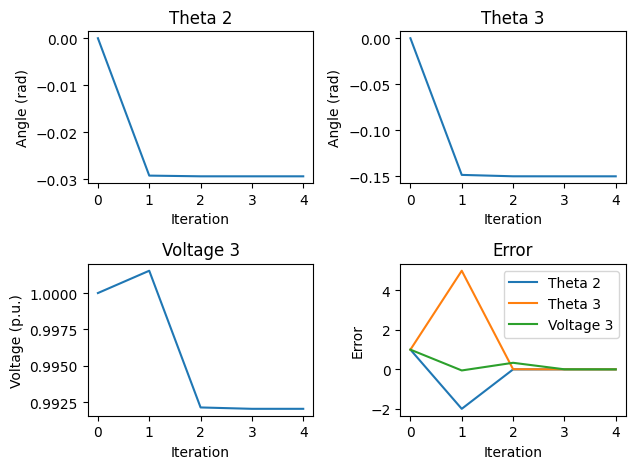

In [4]:
plt.subplot(2,2,1,title='Theta 2',xlabel='Iteration',ylabel='Angle (rad)')
plt.plot(NR_iteration,NR_theta2)
plt.subplot(2,2,2,title='Theta 3',xlabel='Iteration',ylabel='Angle (rad)')
plt.plot(NR_iteration,NR_theta3)
plt.subplot(2,2,3,title='Voltage 3',xlabel='Iteration',ylabel='Voltage (p.u.)')
plt.plot(NR_iteration,NR_voltage3)
plt.subplot(2,2,4,title='Error',xlabel='Iteration',ylabel='Error')
plt.plot(NR_iteration,NR_t2error,NR_iteration,NR_t3error,NR_iteration,NR_v3error)
plt.legend(['Theta 2','Theta 3','Voltage 3'],loc=1)
plt.tight_layout()

## Power Flow Analysis Using Fast Decoupled Load Flow

In [5]:
# plot arrays
FDLF_iteration = []
FDLF_theta2 = []
FDLF_theta3 = []
FDLF_voltage3 = []
FDLF_t2error = []
FDLF_t3error = []
FDLF_v3error = []
# admittance matrix, B', and B''
Y = np.array([[-36.92,21.097,15.823],[21.097,-42.194,21.097],[15.823,21.097,-36.92]])
Bp = np.array([[-42.194,21.097],[21.097,-36.92]])
Bpp = -36.92
# known variables
v1 = 1
t1 = 0
v2 = 1.05
p2 = 2
p3 = -5
q3 = -1
# unknown variables / initial guesses
t2 = 0
t3 = 0
v3 = 1
FDLF_iteration.append(0)
FDLF_theta2.append(t2)
FDLF_theta3.append(t3)
FDLF_voltage3.append(v3)
FDLF_t2error.append(1)
FDLF_t3error.append(1)
FDLF_v3error.append(1)
# parameters
max_iter = 10
threshold = 0.0001
i = 0
done = False

# perform FDLF analysis
while not done:
    i += 1
    # calculated values
    p2c = (v2*v1*Y[1,0]*sin(t2-t1))+(v2*v3*Y[1,2]*sin(t2-t3))
    p3c = (v3*v1*Y[2,0]*sin(t3-t1))+(v3*v2*Y[2,1]*sin(t3-t2))
    q3c = (-Y[2,2]*(v3**2))-(v3*v1*Y[2,0]*cos(t3-t1))-(v3*v2*Y[2,1]*cos(t3-t2))
    # print(f"p2c: {p2c} | p3c: {p3c} | q3c: {q3c}")
    # power mismatch
    dp2 = p2 - p2c
    dp3 = p3 - p3c
    dq3 = q3 - q3c
    # print(f"dp2: {dp2} | dp3: {dp3} | dq3 {dq3}")
    # update unknown angles
    angles = np.array([[t2],[t3]])
    angles = angles - np.dot(np.linalg.inv(Bp),np.array([[dp2/v2],[dp3/v3]]))
    # print(f"angles: {angles}")
    t2 = angles[0,0]
    t3 = angles[1,0]
    # print(f"d2: {t2} | d3 {t3}")
    # update unknown voltages
    v3 = v3 - ((-25/923)*(dq3/v3))
    # print(f"v3: {v3}\n\n")
    # update plot arrays and update i
    FDLF_iteration.append(i)
    FDLF_theta2.append(t2)
    FDLF_theta3.append(t3)
    FDLF_voltage3.append(v3)
    FDLF_t2error.append(dp2)
    FDLF_t3error.append(dp3)
    FDLF_v3error.append(dq3)
    # print results each iteration
    print(f"\nIteration: {i}\nUnknowns: d2: {t2} | d3: {t3} | v3: {v3}\nKnowns: p2c: {p2c} | p3c: {p3c} | q3c: {q3c}")
    # check threshold
    if (abs(dp2)<threshold) and (abs(dp3)<threshold) and (abs(dq3)<threshold):
        print(f"\nERROR CRITERIA MET AFTER {i} ITERATIONS")
        done = True
    if i >= max_iter:
        break
print(f"\nFinal Results:\nTheta 2 = {t2} rad | Theta 3 = {t3} rad | Voltage 3 = {v3} p.u.")
print(f"Percent Error:\nTheta 2: {PCE(t2,theta2_true)}% | Theta 3: {PCE(t3,theta3_true)}% | Voltage 3: {PCE(v3,voltage3_true)}%")


Iteration: 1
Unknowns: d2: -0.0315993420015630 | d3: -0.153484596917849 | v3: 1.00148564463705
Knowns: p2c: 0 | p3c: 0 | q3c: -1.05485000000000

Iteration: 2
Unknowns: d2: -0.0292472881245420 | d3: -0.148896164628094 | v3: 0.992036381194355
Knowns: p2c: 1.99743757446642 | p3c: -5.11996159541584 | q3c: -0.650614901595748

Iteration: 3
Unknowns: d2: -0.0293899096732862 | d3: -0.150297403980373 | v3: 0.992236606761317
Knowns: p2c: 1.97527861836331 | p3c: -4.95166315621932 | q3c: -1.00733345825049

Iteration: 4
Unknowns: d2: -0.0293575854454589 | d3: -0.150227588362042 | v3: 0.992062001581438
Knowns: p2c: 2.00011446221253 | p3c: -5.00188093173038 | q3c: -0.993603622877494

Iteration: 5
Unknowns: d2: -0.0293604466190347 | d3: -0.150253815277286 | v3: 0.992064389033781
Knowns: p2c: 1.99954578588332 | p3c: -4.99909927165897 | q3c: -1.00008744504770

Iteration: 6
Unknowns: d2: -0.0293598637589708 | d3: -0.150252715030069 | v3: 0.992061081788902
Knowns: p2c: 1.99999854965390 | p3c: -5.00002809

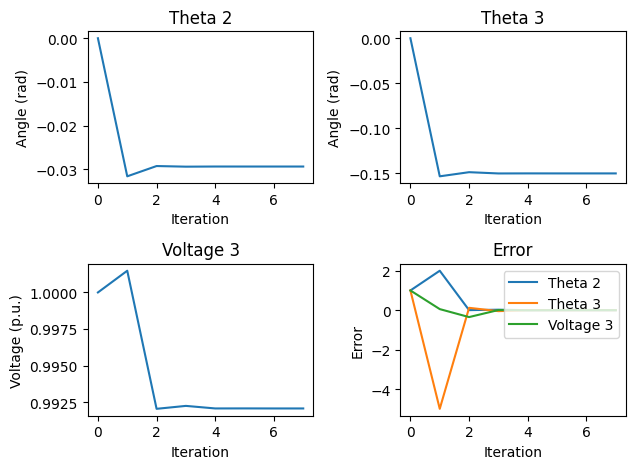

In [6]:
plt.subplot(2,2,1,title='Theta 2',xlabel='Iteration',ylabel='Angle (rad)')
plt.plot(FDLF_iteration,FDLF_theta2)
plt.subplot(2,2,2,title='Theta 3',xlabel='Iteration',ylabel='Angle (rad)')
plt.plot(FDLF_iteration,FDLF_theta3)
plt.subplot(2,2,3,title='Voltage 3',xlabel='Iteration',ylabel='Voltage (p.u.)')
plt.plot(FDLF_iteration,FDLF_voltage3)
plt.subplot(2,2,4,title='Error',xlabel='Iteration',ylabel='Error')
plt.plot(FDLF_iteration,FDLF_t2error,FDLF_iteration,FDLF_t3error,FDLF_iteration,FDLF_v3error)
plt.legend(['Theta 2','Theta 3','Voltage 3'],loc=1)
plt.tight_layout()